In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora, models
import pandas as pd
from nltk import FreqDist
import re
# [InternetShortcut]URL=http://localhost:8889/notebooks/LDA%20Model.ipynb#
import spacy
import numpy as np
# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\14702\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """


In [4]:
nltk.download('stopwords')
 # one time run

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\14702\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#!python -m spacy download en
import en_core_web_sm
nlp = en_core_web_sm.load()

In [74]:
df = pd.read_csv("C:/Users/14702/OneDrive/Desktop/cat_data1.csv")

In [75]:
df.head(10)

,Unnamed: 0,sku,model,description,brand,weburl,text,caption,rootcategory,category,...,reviewdate,stars,retail,sku_number,brand_binary,SBDsum,model_cate,max_mc,product,m_cate
0,1,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,Excellent attachments. Very good suction. Qual...,Excellent attachments. Very good suction. Qual...,Tools,wet & dry vacuums,...,2019-02-07,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
1,2,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,Vacuum has good suction and is not too noisy. ...,Vacuum has good suction and is not too noisy. ...,Tools,wet & dry vacuums,...,2019-02-12,3,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
2,3,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,The auto detail kit it came with as a extra ha...,The auto detail kit it came with as a extra ha...,Tools,wet & dry vacuums,...,2019-02-12,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
3,4,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,Vacuum works very well. The extra hose and att...,Vacuum works very well. The extra hose and att...,Tools,wet & dry vacuums,...,2019-02-12,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
4,5,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,Bought this exact shop vac this morning at our...,Bought this exact shop vac this morning at our...,Tools,wet & dry vacuums,...,2019-02-23,1,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
5,6,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,This is a great purchase with the extra parts ...,This is a great purchase with the extra parts ...,Tools,wet & dry vacuums,...,2019-03-12,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
6,7,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,Very satisfied with the performance of this Ri...,Very satisfied with the performance of this Ri...,Tools,wet & dry vacuums,...,2019-03-12,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
7,8,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,Excellent. Would have probably downsized a bit...,Excellent. Would have probably downsized a bit...,Tools,wet & dry vacuums,...,2019-03-12,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
8,9,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,All of it especially the auto detail kit is gr...,All of it especially the auto detail kit is gr...,Tools,wet & dry vacuums,...,2019-03-12,4,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums
9,10,308343494,HD1401,RIDGID 14 Gal. 6.0-Peak HP NXT Wet Dry Vac wit...,RIDGID,https://www.homedepot.com/p/RIDGID-14-Gal-6-0-...,"works very well, all of the attachments fill a...","works very well, all of the attachments fill a...",Tools,wet & dry vacuums,...,2019-03-19,5,homedepot,502,0,488,502,502,HD1401 RIDGID,wet & dry vacuums


In [76]:
df['text']
df['text'].isnull().sum()

#remove null values
df = df[df['text'].notnull()]

In [77]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [78]:
stop_words = stopwords.words('english')

In [79]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [80]:
# remove unwanted characters, numbers and symbols
df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")

In [81]:
# remove short words (length < 4)
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>4]))

In [82]:
# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

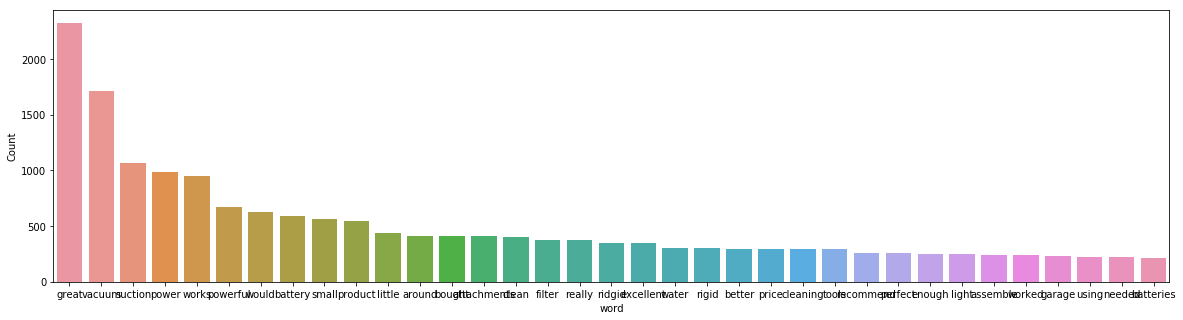

In [83]:
freq_words(reviews, 35)

In [84]:
# lemmatization

import en_core_web_sm
nlp = en_core_web_sm.load(disable=['parser', 'ner'])


def lemmatization(texts, tags=[ 'NOUN']): # use verbs, adjectives and nouns 
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

# delete most common words, such as relating the to product's name
def delete_product_name(token_list):
    return [x for x in token_list if x not in ['kindle','fire','amazon', 'device', 'tablet', 'book', 'thing']]
tokenized_reviews = tokenized_reviews.apply(delete_product_name)

reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2) # print lemmatized review

['vacuum', 'suction', 'noisy', 'biggest', 'complaint', 'tubes', 'tools', 'together', 'there', 'locking', 'feature', 'everything', 'keeps', 'coming', 'apart', 'especially', 'tools', 'frustrating', 'reason', 'would', 'recommend', 'brands']


[['attachment', 'suction', 'quality', 'construction'], ['vacuum', 'suction', 'complaint', 'tube', 'tool', 'feature', 'tool', 'reason', 'brand'], ['suction', 'floor', 'floorboard', 'carpet', 'package', 'quality'], ['vacuum', 'attachment', 'noise', 'level'], ['morning', 'water', 'basement', 'working', 'exhaust', 'portion', 'water', 'object', 'thing', 'pant', 'design', 'sense', 'thing', 'sheetrock', 'product'], ['purchase', 'part', 'plenty', 'suction', 'attachment', 'motor', 'vacuum'], ['performance', 'vacuum', 'accessory'], ['suction'], ['detail', 'month'], ['work', 'attachment', 'suction', 'extension', 'phenomenal'], ['bulky', 'footprint', 'gallon', 'connection', 'vacuum', 'storage', 'attachment', 'vacuum', 'work'], [], ['suction', 'power', 'accessory', 'assignment', 'year'], ['expectation'], ['hose', 'suction', 'quieter'], ['filter', 'floor', 'filter', 'change'], [], ['paper', 'string', 'glitter', 'husband'], ['plenty', 'power', 'vacuum', 'model', 'construction', 'industry', 'reason', 

In [85]:
[x for x in reviews_2 if x not in stop_words]

[['attachment', 'suction', 'quality', 'construction'],
 ['vacuum',
  'suction',
  'complaint',
  'tube',
  'tool',
  'feature',
  'tool',
  'reason',
  'brand'],
 ['suction', 'floor', 'floorboard', 'carpet', 'package', 'quality'],
 ['vacuum', 'attachment', 'noise', 'level'],
 ['morning',
  'water',
  'basement',
  'working',
  'exhaust',
  'portion',
  'water',
  'object',
  'thing',
  'pant',
  'design',
  'sense',
  'thing',
  'sheetrock',
  'product'],
 ['purchase', 'part', 'plenty', 'suction', 'attachment', 'motor', 'vacuum'],
 ['performance', 'vacuum', 'accessory'],
 ['suction'],
 ['detail', 'month'],
 ['work', 'attachment', 'suction', 'extension', 'phenomenal'],
 ['bulky',
  'footprint',
  'gallon',
  'connection',
  'vacuum',
  'storage',
  'attachment',
  'vacuum',
  'work'],
 [],
 ['suction', 'power', 'accessory', 'assignment', 'year'],
 ['expectation'],
 ['hose', 'suction', 'quieter'],
 ['filter', 'floor', 'filter', 'change'],
 [],
 ['paper', 'string', 'glitter', 'husband'],


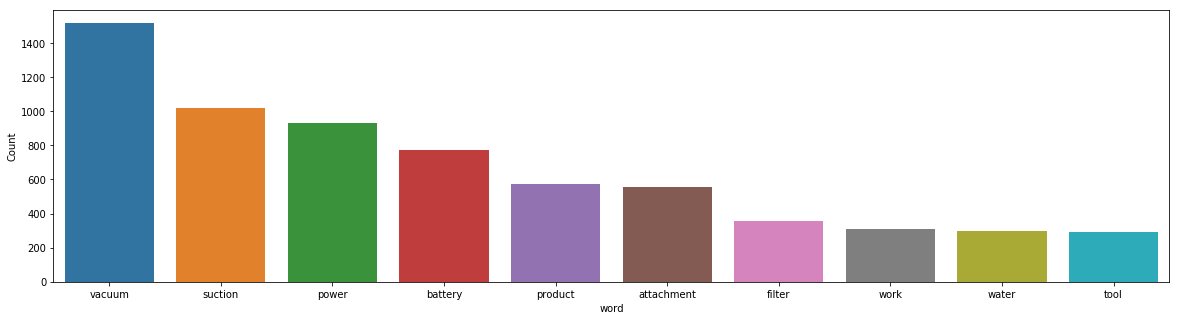

In [86]:
# replace review column with the cleaned version
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

# Visualize
freq_words(df['reviews'], 10)

### Modelling

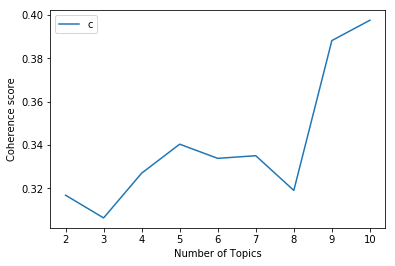

In [87]:
from gensim.models.coherencemodel import CoherenceModel
dictionary = corpora.Dictionary(reviews_2)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# check coherence score to decide number of topics 
c_v_score = []
for i in range(2,11):
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = i, random_state = 44,
                chunksize = 1000, passes = 50)
    c_v_score.append(CoherenceModel(model=lda_model, texts=reviews_2, dictionary=dictionary, coherence='c_v').get_coherence())

# plot the score
# plot the coherence score
x = range(2, 11)
plt.plot(x, c_v_score)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
# train the model on optimal number of topics 
lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, num_topics = c_v_score.index(max(c_v_score))+1, random_state = 44,
                chunksize = 1000, passes = 50)

In [89]:
# get the topics
lda_model.print_topics()

[(0,
  '0.226*"product" + 0.079*"year" + 0.053*"motor" + 0.039*"machine" + 0.035*"time" + 0.029*"couple" + 0.027*"review" + 0.027*"problem" + 0.025*"expectation" + 0.018*"capacity"'),
 (1,
  '0.300*"battery" + 0.096*"tool" + 0.074*"attachment" + 0.034*"brush" + 0.028*"charger" + 0.028*"money" + 0.017*"charge" + 0.016*"drill" + 0.015*"light" + 0.012*"cordless"'),
 (2,
  '0.316*"vacuum" + 0.076*"water" + 0.036*"minute" + 0.029*"purchase" + 0.026*"feature" + 0.026*"basement" + 0.018*"drain" + 0.017*"service" + 0.016*"wheel" + 0.015*"option"'),
 (3,
  '0.123*"filter" + 0.045*"weight" + 0.043*"cleaning" + 0.034*"truck" + 0.031*"performance" + 0.027*"vehicle" + 0.026*"assemble" + 0.024*"exhaust" + 0.023*"drywall" + 0.021*"recommend"'),
 (4,
  '0.072*"screw" + 0.068*"vacuum" + 0.056*"quality" + 0.053*"store" + 0.045*"attachment" + 0.041*"wheel" + 0.031*"assembly" + 0.029*"handle" + 0.028*"piece" + 0.021*"part"'),
 (5,
  '0.340*"power" + 0.110*"work" + 0.067*"suction" + 0.052*"plenty" + 0.015*

In [90]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\14702\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.233520  0.150784       1        1  13.444668
8     -0.133617 -0.131487       2        1  13.086589
4     -0.208524  0.021743       3        1  11.745561
7      0.212817  0.167590       4        1  11.101224
5      0.129703 -0.178923       5        1  10.803485
6     -0.086081 -0.140020       6        1  10.781182
1      0.079337 -0.162898       7        1  10.614622
0      0.024834  0.253219       8        1   9.709408
3      0.215051  0.019992       9        1   8.713261, topic_info=     Category         Freq         Term        Total  loglift  logprob
47    Default   811.000000        power   811.000000  30.0000  30.0000
10    Default  1412.000000       vacuum  1412.000000  29.0000  29.0000
711   Default   703.000000      battery   703.000000  28.0000  28.0000
24    Default   483.000000      product   483.000000  27.0000  27.0000
3     Default   912.000000      suction   912.000000  26.0000  26.0000
40    Default   262.000000         work   262.000000  25.0000  25.0000
53    Default   350.000000       filter   350.000000  24.0000  24.0000
34    Default   236.000000    accessory   236.000000  23.0000  23.0000
8     Default   263.000000         tool   263.000000  22.0000  22.0000
61    Default   250.000000        price   250.000000  21.0000  21.0000
116   Default   225.000000       garage   225.000000  20.0000  20.0000
0     Default   477.000000   attachment   477.000000  19.0000  19.0000
147   Default   185.000000        screw   185.000000  18.0000  18.0000
28    Default   253.000000        water   253.000000  17.0000  17.0000
48    Default   192.000000         year   192.000000  16.0000  16.0000
44    Default   153.000000       gallon   153.000000  15.0000  15.0000
2     Default   164.000000      quality   164.000000  14.0000  14.0000
60    Default   129.000000        model   129.000000  13.0000  13.0000
32    Default   125.000000       plenty   125.000000  12.0000  12.0000
103   Default   161.000000        store   161.000000  11.0000  11.0000
12    Default   209.000000        floor   209.000000  10.0000  10.0000
104   Default   150.000000       blower   150.000000   9.0000   9.0000
30    Default   138.000000        motor   138.000000   8.0000   8.0000
45    Default   182.000000      storage   182.000000   7.0000   7.0000
201   Default   120.000000       weight   120.000000   6.0000   6.0000
71    Default   106.000000       minute   106.000000   5.0000   5.0000
231   Default   182.000000        wheel   182.000000   4.0000   4.0000
70    Default   123.000000      machine   123.000000   3.0000   3.0000
105   Default   119.000000     cleaning   119.000000   2.0000   2.0000
165   Default    93.000000        place    93.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
310    Topic9    26.783072     workshop    27.543215   2.4123  -4.2722
992    Topic9    23.310543        style    24.070787   2.4082  -4.4111
833    Topic9    22.981815       volume    23.741913   2.4078  -4.4253
904    Topic9    22.300491        grade    23.060665   2.4068  -4.4554
647    Topic9    19.621700      sawdust    20.381758   2.4023  -4.5834
233    Topic9    19.274673    operation    20.034988   2.4016  -4.6012
495    Topic9    18.688580        miter    19.448530   2.4005  -4.6321
600    Topic9    16.620890    collector    17.380804   2.3956  -4.7494
133    Topic9    15.866734        flood    16.626703   2.3935  -4.7958
412    Topic9    13.395494      fitting    14.155736   2.3851  -4.9651
294    Topic9    12.774959         vent    13.535302   2.3825  -5.0125
55     Topic9    12.105693      husband    12.865738   2.3794  -5.0663
1577   Topic9    11.030355       mortar    11.790295   2.3737  -5.1594
1615   Topic9    11.030270        chair    11.790215   2.3737  -5.1594
1068   Topic9    11.031032        owner    11.791204   2.3737  -5.1593
1339   Topic9    10.427469